# Logistic Regression with Macro Data

### Loading Libraries

In [2]:
# Numerical Computing
import numpy as np

# Data Manipulation
import pandas as pd

# StatsModel
import statsmodels.api as sm

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

### Loading Dataset

In [62]:
data = pd.DataFrame(sm.datasets.macrodata.load().data)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      203 non-null    float64
 1   quarter   203 non-null    float64
 2   realgdp   203 non-null    float64
 3   realcons  203 non-null    float64
 4   realinv   203 non-null    float64
 5   realgovt  203 non-null    float64
 6   realdpi   203 non-null    float64
 7   cpi       203 non-null    float64
 8   m1        203 non-null    float64
 9   tbilrate  203 non-null    float64
 10  unemp     203 non-null    float64
 11  pop       203 non-null    float64
 12  infl      203 non-null    float64
 13  realint   203 non-null    float64
dtypes: float64(14)
memory usage: 22.3 KB


In [63]:
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


### Data Preparation

In [64]:
data['growth_rate'] = data.realgdp.pct_change(4)

data['target'] = (data.growth_rate > data.growth_rate.rolling(20).mean()).astype(int).shift(-1)

In [65]:
data.quarter = data.quarter.astype(int)

In [66]:
data.target.value_counts()

target
0.0    112
1.0     90
Name: count, dtype: int64

In [67]:
data.tail()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint,growth_rate,target
198,2008.0,3,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33,0.000262,0.0
199,2008.0,4,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91,-0.018619,0.0
200,2009.0,1,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71,-0.033026,0.0
201,2009.0,2,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19,-0.038297,0.0
202,2009.0,3,12990.341,9256.0,1486.398,1044.088,10040.6,216.385,1673.9,0.12,9.6,308.013,3.56,-3.44,-0.025086,NaN


In [68]:
pct_cols = ['realcons', 'realinv', 'realgovt', 'realdpi', 'm1']

drop_cols = ['year', 'realgdp', 'pop', 'cpi', 'growth_rate']

In [69]:
data = pd.get_dummies(data.drop(drop_cols, axis=1), columns=['quarter'], drop_first=True).dropna()

In [70]:
data.head()

,realcons,realinv,realgovt,realdpi,m1,tbilrate,unemp,infl,realint,target,quarter_2,quarter_3,quarter_4
0,1707.4,286.898,470.045,1886.9,139.7,2.82,5.8,0.00,0.00,0.0,False,False,False
1,1733.7,310.859,481.301,1919.7,141.7,3.08,5.1,2.34,0.74,0.0,True,False,False
2,1751.8,289.226,491.260,1916.4,140.5,3.82,5.3,2.74,1.09,0.0,False,True,False
3,1753.7,299.356,484.052,1931.3,140.0,4.33,5.6,0.27,4.06,0.0,False,False,True
4,1770.5,331.722,462.199,1955.5,139.6,3.50,5.2,2.31,1.19,0.0,False,False,False


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, 0 to 201
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   realcons   202 non-null    float64
 1   realinv    202 non-null    float64
 2   realgovt   202 non-null    float64
 3   realdpi    202 non-null    float64
 4   m1         202 non-null    float64
 5   tbilrate   202 non-null    float64
 6   unemp      202 non-null    float64
 7   infl       202 non-null    float64
 8   realint    202 non-null    float64
 9   target     202 non-null    float64
 10  quarter_2  202 non-null    bool   
 11  quarter_3  202 non-null    bool   
 12  quarter_4  202 non-null    bool   
dtypes: bool(3), float64(10)
memory usage: 18.0 KB


In [ ]:
data = data.astype(float)

In [49]:
data = data.astype(float)

In [ ]:
data.loc[:, pct_cols] = data.loc[:, pct_cols].pct_change(4)

In [76]:
X = data.drop(columns='target')

y = data['target']

In [75]:
data = data.astype(float)

In [82]:
X = sm.add_constant(X)
model = sm.Logit(y, X)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.541746
         Iterations 9


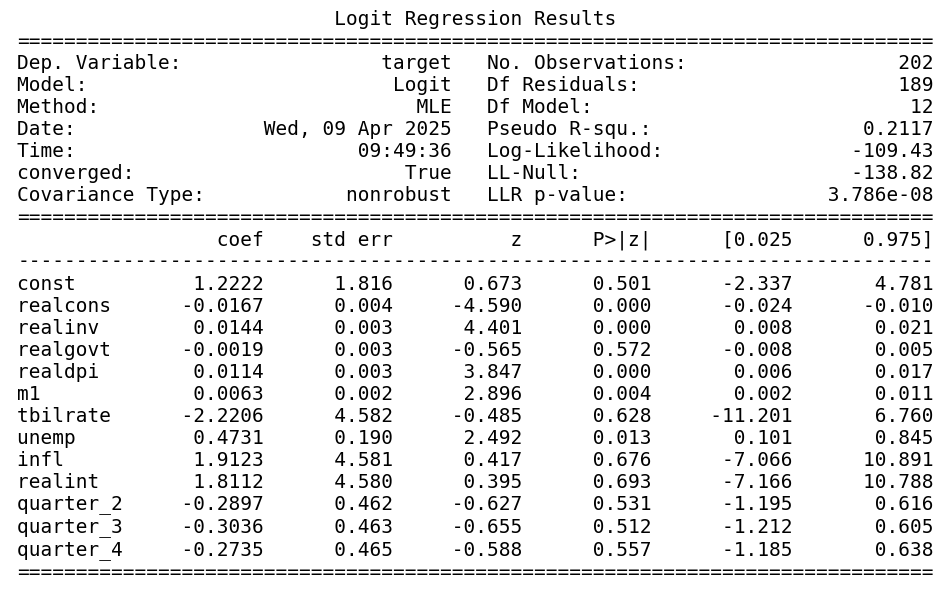

In [83]:
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(result.summary()), {'fontsize': 14}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.1)
plt.savefig('logistic_example.png', bbox_inches='tight', dpi=300);
plt.show()